# Numerical exercises 03


From shell, inside _this_ directory:
- To compile: `make`
- To run the programs: `./execute.sh`

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

## Exercise 03.1: European option pricing

In this exercise we compute the the price of **european** call and put options using a Monte Carlo method. 

A **call option** is a contract between the buyer (also known as _holder_) and the seller of the call option (also known as _writer_) to exchange an asset at a set price $K$. The holder has the right, but is not obliged, to buy the option at a certain time for the set price $K$ (_strike price_).

A **put option** is a contract that gives the holder (the buyer of the put option) the right to sell to the writer (the seller of the put) a financial asset (known as the _underlying_) at a specific strike price $K$, at a set time.

The correct price for a call option would then be: $\langle e^{-rT}\max[0, S(T)-K] \rangle$, that is the expectation value of the estimated gain for the holder rescaled by the factor $e^{-rT}$, the inverse of the rate of growth of the price of the asset, $r$ is the constant interest rate. Basically this factor takes into account the loss in revenues from the interests of the asset before the expiration date of the option. The same goes for the put option, where obviously here we have a change of sign: $\langle e^{-rT} \max\left[0,K-S(T)\right] \rangle$.

### Black- Scholes analytic solution

With the hypothesis that the **asset** price evolution is: $S(t) \sim GBM(\mu,\sigma^2)$, which is the evolution of a geometric brownian motion ($r$, risk free interest rate, and $\sigma$, volatility, both constant), and the hypothesis of a completely efficient market (this is the [Markov assumption](https://en.wikipedia.org/wiki/Causal_Markov_condition): the evolution of the system depends only on the situation at t), the result is given by the [Black-Scholes analytical solution](https://www.youtube.com/watch?v=pr-u4LCFYEY). We give the analytical solution in the cell below, with the definition of the parameters useful to the computation. We will use them as a comparison with the values obtained through our simulations.

In [10]:
S0 = 100.    # asset price at t=0
K = 100.     # strike price
T = 1.       # delivery time
r = 0.1      # risk free interest rate
sigma = 0.25 # volatility
t=0          # intiial time

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES theoretical prices ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES theoretical prices ==
call:  14.975790778311286
put:  5.4595325819072364


### The samplings for the simulations

In our simulation we calculate the call and put profit:
- by **direct sample** of the final price $S(T)$; this is only possible because the characteristic evolution of a $GBM(r, \sigma^2)$ path is known as the solution of the differential equation: $dS(t) = \mu S(t) dt + \sigma S(t) dW(t)$, and has the analytical form: 
$$
S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right],
$$ 
where $W(T) \sim N(0,T)$;
- by **discretized sample** of the $GBM(r, \sigma^2)$ path: we divided the time interval $T$ in $100$ subintervals. In this case the time evolution is given by a discretized $GBM(r, \sigma^2)$, with:
$$
S(t_{i+1})=S(t_i)\exp \left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]
$$ 
with $Z_i$ i.i.d. from $N(0,1)$.


We estimate the averages and uncertaintes using the usual blocking method. We compare our results with the Black-Scholes analytical solution. Our results, calculated with both methods, are compatible with the theoretical result. Given the equivalence of both methods, the discretized sample is to be preferred in many real-life situation, where the time evolution is not as simple as it is in this case an it is not therefore analytically known.

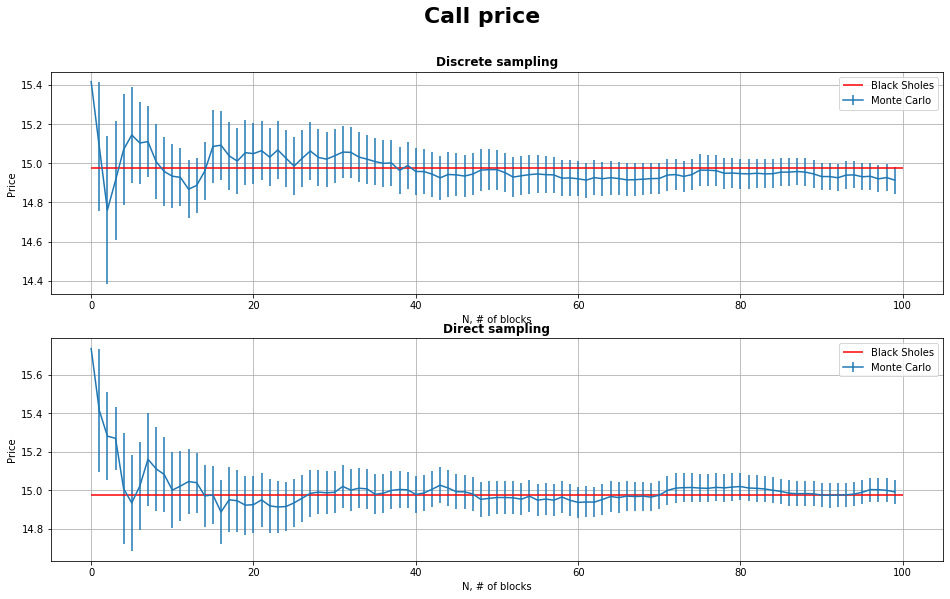

In [28]:
x1,y1,err1=np.loadtxt("ex3.1/call_discretized.dat",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("ex3.1/call_direct.dat",usecols=(0,1,2),unpack=True)
fig=plt.figure(figsize=(16, 9))
fig.suptitle("Call price", size=22, ha='center', weight='bold')

plt.subplot(211)
plt.errorbar(x1,y1,yerr=err1, label='Monte Carlo')
plt.hlines(14.975790778311286, 0, 100,color='red', label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Discrete sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.errorbar(x2,y2,yerr=err2, label='Monte Carlo')
plt.hlines(14.975790778311286, 0, 100, color='red',label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Direct sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)


plt.grid(True)
plt.show()

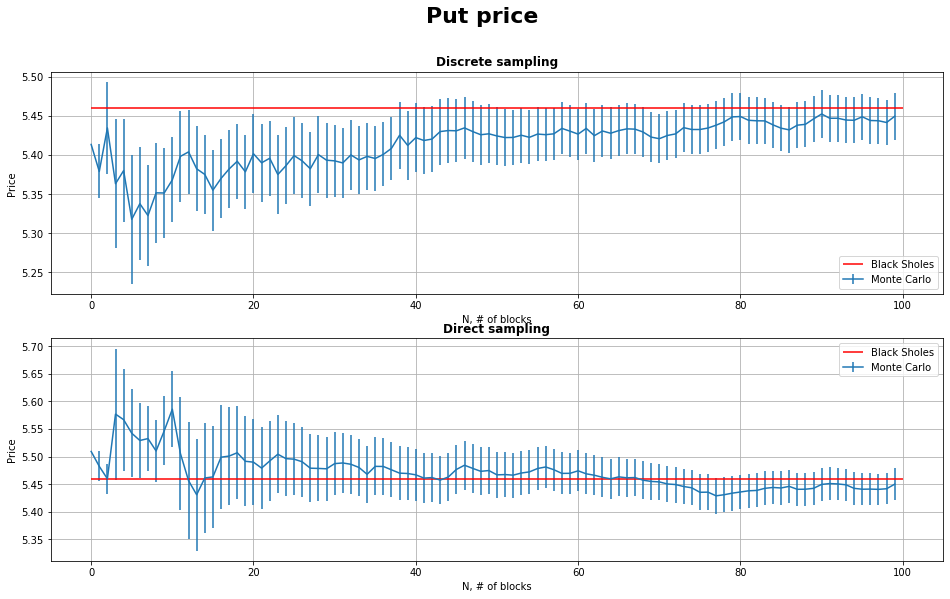

In [33]:
x1,y1,err1=np.loadtxt("ex3.1/put_discretized.dat",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("ex3.1/put_direct.dat",usecols=(0,1,2),unpack=True)
fig=plt.figure(figsize=(16, 9))
fig.suptitle("Put price", size=22, ha='center', weight='bold')

plt.subplot(211)
plt.errorbar(x1,y1,yerr=err1, label='Monte Carlo')
plt.hlines(5.4595325819072364, 0, 100,color='red', label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Discrete sampling",size='large', weight='bold')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(212)
plt.errorbar(x2,y2,yerr=err2, label='Monte Carlo')
plt.hlines(5.4595325819072364, 0, 100, color='red',label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Direct sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)


plt.grid(True)
plt.show()